# Important
To Execute a cell. Press Shift+Enter or Ctrl+Enter

In [1]:
#load all the necessary libraries
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

# Python Recap

## Printing

In [4]:
# here is how you print something
a = 1
b = 2
c = a + b
print(c)

#if you want to show line number View --> Toggle Line Number

3


In [5]:
c

3

## Conditional Statement

In [6]:
#conditional statement
x = 3
if x<5:
    print (x, 'is less than five')
else:
    print (x, 'is not less than five')

3 is less than five


## Define a function

In [7]:
#define a function
def f(x):
    a = 2*x + 1
    return a
print(f(10))

21


## While Loop

In [8]:
#while loop
i = 0
while i < 10:
    i+=1
    print(i, end='') #that's how you avoid new line

12345678910

## For Loop

In [9]:
#here is list and use it
a1 = [1,2,3,4,5,6]
for x in a1:
    print(x, end='')
print('----')
for i,x in enumerate(a1): #if you also want the index
    print(i, x)

123456----
0 1
1 2
2 3
3 4
4 5
5 6


In [10]:
#here is how to build one (not so beautiful)
#Also notice here that I use a1 from the previous cell.
#once you execute the code it's stored in the kernel
a2 = []
for x in a1:
    a2.append(2*x)
print (a2)

[2, 4, 6, 8, 10, 12]


## For Comprehension
We will be using it a lot in this class

In [11]:
#But this is ugly
#let us use list comprehension makes it much easier to read
a3 = [2*x+1 for x in a1]
print (a3)

[3, 5, 7, 9, 11, 13]


## Numpy array and broadcast operation

In [13]:
#but since we will be using it a lot we have something much better
#it's called numpy array

arr = np.linspace(0,1,10) #this gives you 10 number from 0 to 10 equally spaced 
print (arr)
print (2*arr) #array broadcasting magic it does what you think it should
print (arr**2)
print (np.exp(arr)) #exp function

#you can also convert normal list to numpy array if you want
arr3 = np.array(a3)
print(arr3*2)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]
[0.         0.01234568 0.04938272 0.11111111 0.19753086 0.30864198
 0.44444444 0.60493827 0.79012346 1.        ]
[1.         1.11751907 1.24884887 1.39561243 1.5596235  1.742909
 1.94773404 2.17662993 2.43242545 2.71828183]
[ 6 10 14 18 22 26]


## Plotting

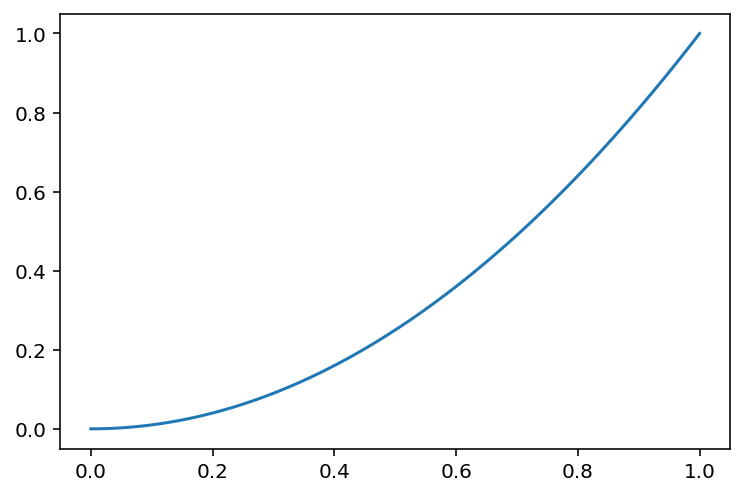

In [14]:
#plotting is easy
xs = np.linspace(0,1,100)
ys = xs**2
plt.plot(xs,ys)
plt.savefig('first_plot.pdf') #you can save it too

In [15]:
!open .

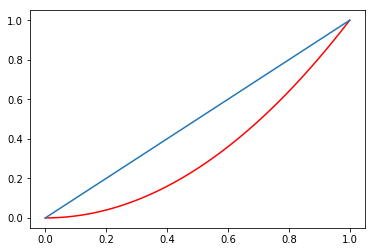

In [17]:
plt.plot(xs,ys, color='red') #change the style too
plt.plot(xs,xs) #and you can plot two things on the same graph
#It can do much more see: http://matplotlib.org/gallery.html

# Root Finding

## Consider $x = cos(x)$. Our goal is to solve for x that satisfy that.

Plot something that helps you solve it.

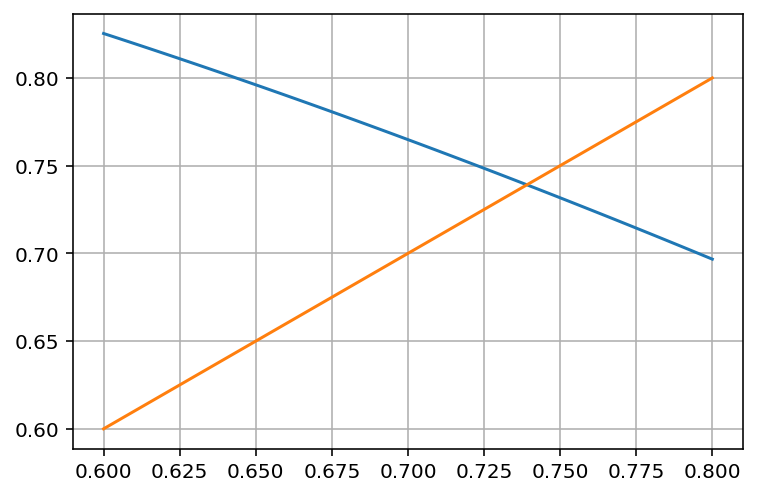

In [22]:
# y = cos(x)
# y = x
# tab for auto complete
# shift+tab for doc
xs = np.linspace(0.6, 0.8, 100)
ys = np.cos(xs)


plt.plot(xs, ys)
ys_2 = xs
plt.plot(xs, ys_2)

plt.grid()

## Given the what you did what is your answer?

## How accurate is your answer?
$answer = \ldots \pm \ldots$

Accuracy is also an important part for numerical algorithm --> How fast we can improve our accuracy.

## Make it more accurate

## Write the equation above as $f(x)= 0$

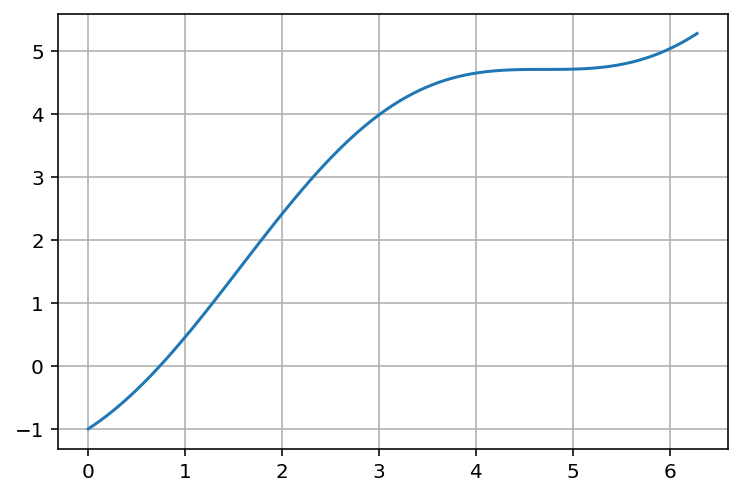

In [25]:
def f(x):
    return x-np.cos(x)

xs = np.linspace(0, 2*np.pi, 100)
plt.plot(xs, f(xs))
plt.grid()

In [31]:
for x in np.linspace(0, 1, 100000):
    if abs(f(x)) < 1e-4:
        print(x)

0.7390273902739027
0.7390373903739037
0.7390473904739048
0.7390573905739057
0.7390673906739067
0.7390773907739078
0.7390873908739087
0.7390973909739097
0.7391073910739108
0.7391173911739117
0.7391273912739127
0.7391373913739138


In [38]:
xs = np.linspace(0, 1, 100000)
cost = np.abs(f(xs))
idx = np.argmin(cost) # give you the index in which minimum occur
best_answer = xs[idx]

print(best_answer, f(best_answer))

0.7390873908739087 3.778446722169093e-06


In [39]:
5/ np.log10(2)

16.609640474436812

# Bisection

## If you use a bisection method and your starting bound is $x=0.2$ and $x=1.2$, how do you know that there is a solution by looking only at $f(0.2)$ and $f(1.2)$

In [40]:
def f(x):
    return x - np.cos(x)

## Plot the graph along with the two vertical line representing the bound. (use plt.axvline)

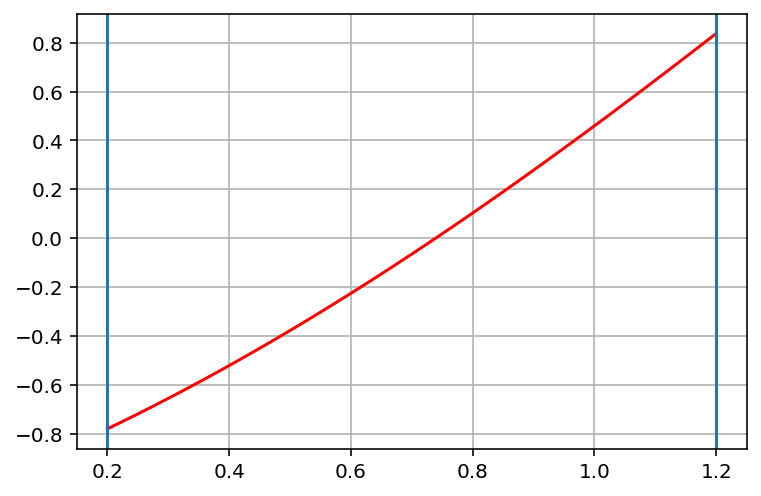

In [45]:
xs = np.linspace(0.2, 1.2, 100)
ys = f(xs)
plt.plot(xs, ys, 'r')
plt.axvline(0.2)
plt.axvline(1.2)
plt.grid()

## If we guess right in the middle of the two bound what would be the error on our guess?
$$
    answer = \ldots \pm \ldots
$$


## If you want to make a new pair of bound which pair would you pick? How did you know?

## Write a function which find solution to f(x)=0 using the method you just discovered. Try plotting as you go.

In [49]:
from typing import Callable, Tuple
def bisection(f: Callable[[float], float], 
              a: float, b: float, n: int) -> Tuple[float, float, float]:

    left = a
    right = b
    for i in range(n):
        guess = (left + right)/2
        if f(guess)*f(left) < 0: # answer on the left
            right = guess
        else: # answer on the right
            left = guess
    return guess, left, right

x, l, r = bisection(f, 0.2, 1.2, 100)
print(x, f(x))

0.7390851332151616 1.5543122344752192e-15


## Given that the intial bound is of size $S$. After $n$ iterations how accurate is your answer?

$$\text{error}(n) = \ldots$$

## Give me the solution to  $x=cos(x)$ that is at most  $10^{−6}$ away from the real answer. Verify your solution graphically.

# Newton's Method
Let us do someting a bit more efficient. Suppose that we want to solve  $x^3−x=1$  using Newtons's method with initial guess at  $x=2$ . If you start to get lost, PLOT!.

## What is the function that we are trying to find intercept? Plot it.

$f(x) = x^3 -x -1$

In [51]:
# f(x) = x^3 - x - 1

def f(x):
    return x**3 - x -1

def fp(x):
    return 3*x**2 - 1


## What is the slope of the tangent line at $x=2$

1.5454545454545454 1.1457550713749058
1.359614915915184 0.15370493448007472
1.325801345005845 0.004624917047829857
1.3247190494171253 4.657719109291136e-06
1.3247179572458576 4.740430270544493e-12
1.324717957244746 2.220446049250313e-16
1.324717957244746 2.220446049250313e-16
1.324717957244746 2.220446049250313e-16
1.324717957244746 2.220446049250313e-16
1.324717957244746 2.220446049250313e-16
1.324717957244746 2.220446049250313e-16


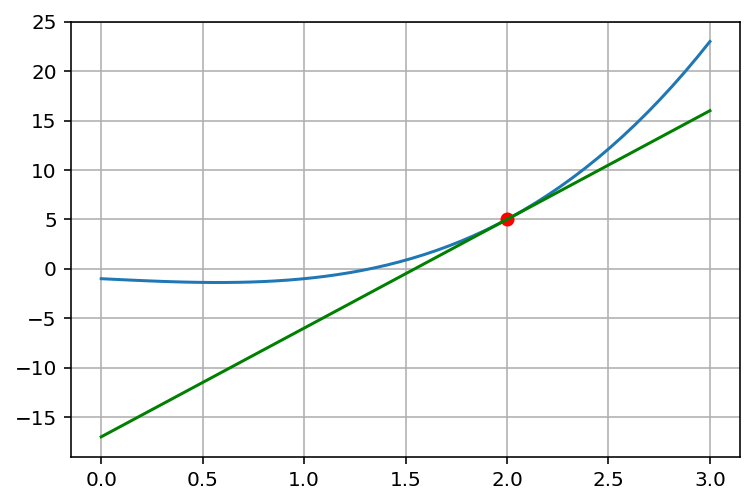

In [61]:
xs = np.linspace(0, 3)
plt.plot(xs, f(xs))
x = 2
plt.plot(x, f(x), 'or')
m = fp(x)
c = f(x) - fp(x)*x
plt.plot(xs, m*xs + c, 'g')
# y = fp(x) * x + c
plt.grid()

def newton(f, fp, x0, n):
    x = x0
    for _ in range(n):
        x = x - f(x)/fp(x)
        print(x, f(x))
    return x

ans = newton(f, fp, 2, 10)
print(ans, f(ans))

## What is the equation for the tangent line at  $x=2$ Plot it along with the function.

## What is the intercept for that line? That's your new guess.

## Now combine everything in to one formula you should get something along the line of

$$
x_{n+1} = \ldots - \frac{\ldots(x_n)}{\ldots(x_n)}
$$

This is called update rule; how you get an improved answer from the previous guess.

## Newton's method converges very very quickly. We will go through the derivation later on.
Now find solution to $x^3−x=1$. Also as a plotting exercise try make something similar to this figure:

Here is how I annotate the figure
`plt.annotate('x%d'%i, xy=(x, 0), xytext=(x,-0.2), fontsize=18)`

<div>
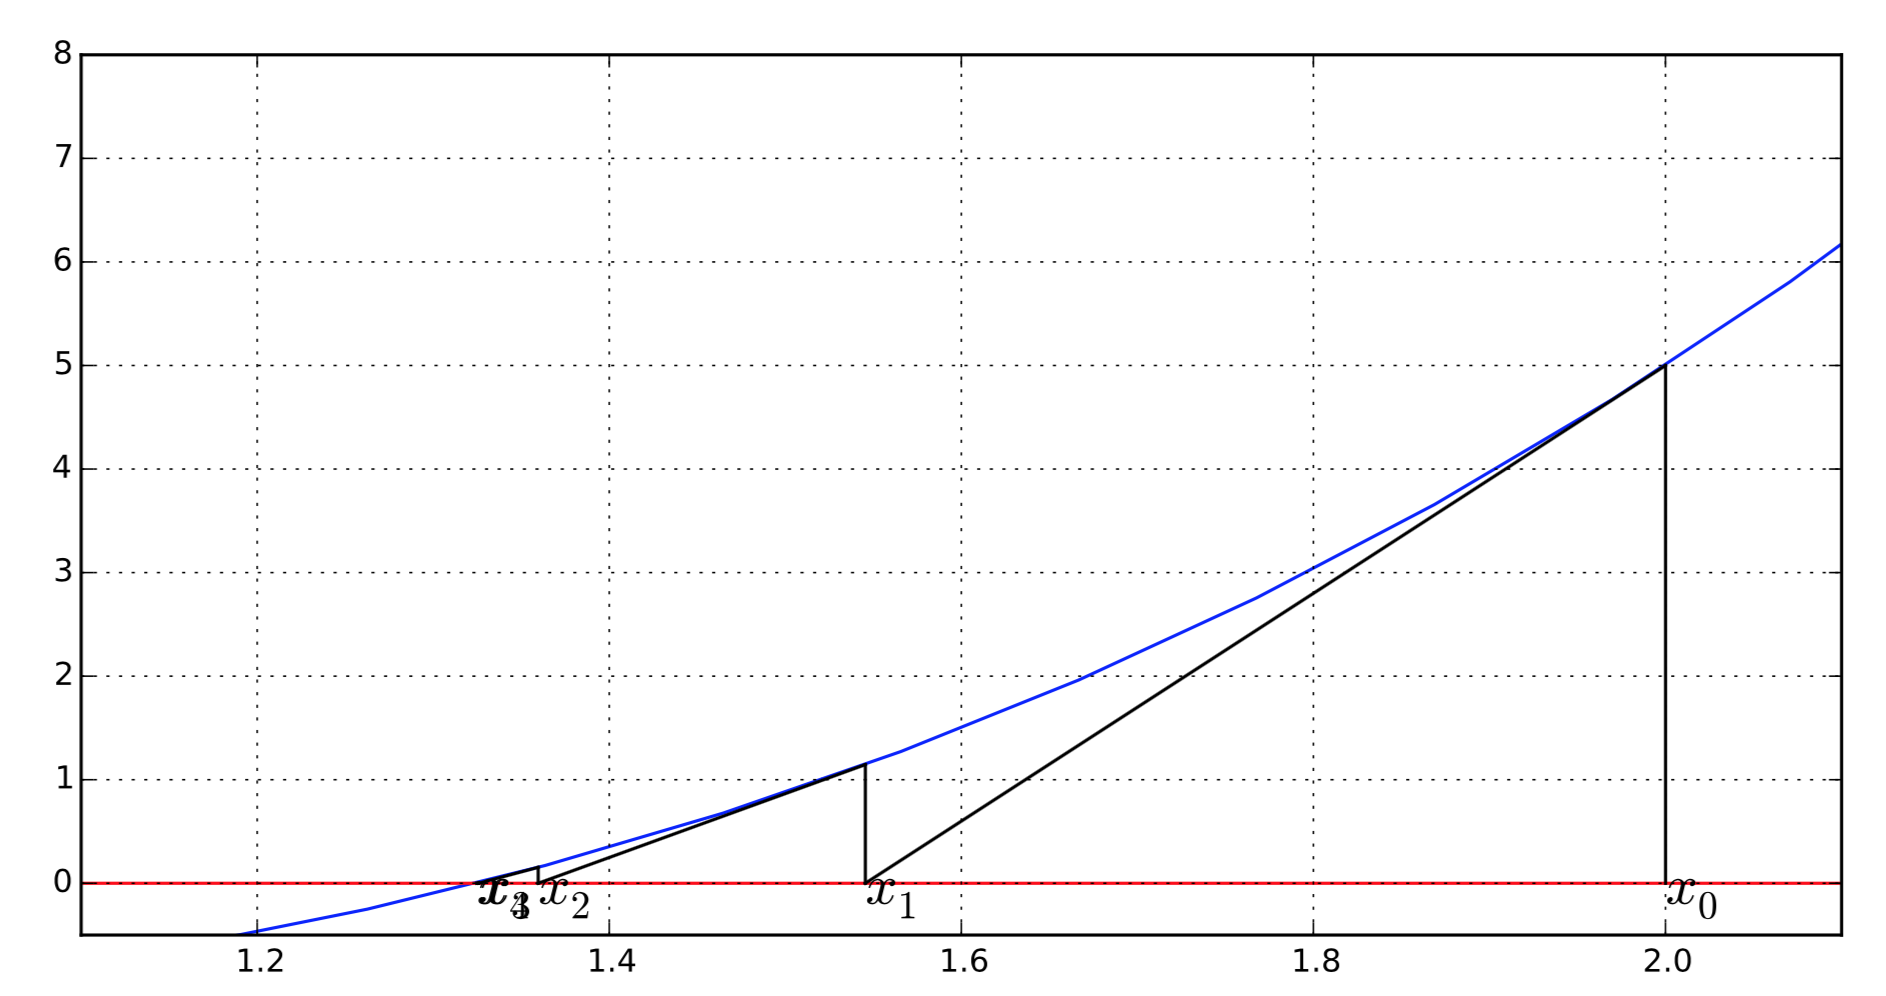
</div>


## Solve $\sqrt[3]{x}=0$ by hand. What's $x$?

In [79]:
import math
def f(x):
    return np.sign(x)*np.power(np.abs(x),(1/3))

def fp(x):
    return 1/3*np.sign(x)*np.power(np.abs(x),(-2/3))

newton(f, fp, 0.1, 7)

-0.20000000000000004 -0.5848035476425733
-0.8000000000000002 -0.9283177667225558
-3.2000000000000006 -1.4736125994561546
-12.800000000000002 -2.339214190570293
-51.20000000000001 -3.713271066890223
-204.8 -5.894450397824618
-819.1999999999998 -9.35685676228117


-819.1999999999998

## Try Newton's method on it.
Try plotting as you go to see what's going on.

Now you learn that even though it converges super fast. It doesn't guarantee to converge.

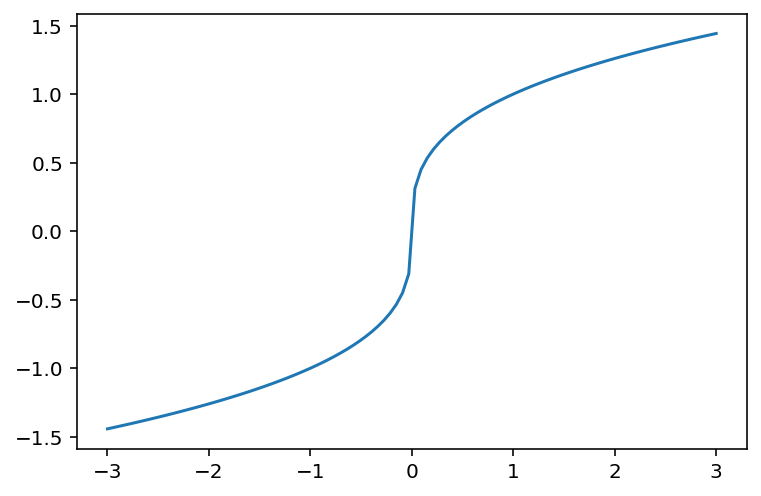

In [80]:
xs = np.linspace(-3, 3, 100)
plt.plot(xs, f(xs))

# Bonus


## Simplify (1+x)-1

## Then why is this false

In [3]:
x = 1e-10
print (x)
print ((1+x)-1 == x)

1e-10
False
